In [1]:
import numpy as np
import roadrunner
import pandas as pd
import matplotlib.pyplot as plt

SEED=1
np.random.seed(seed=SEED)

# Model system parameters
MODEL_SBML_FILE = "model_Neg_Feed_Oscillate.xml"
DURATION = 36

# Synthetic dataset parameters
NOISE = 0.02 # % Gaussian noise (range is 0-1)
N_PTS = DURATION * 1000 + 1
T_PTS = np.arange(0,37,6).astype(float)
SPEC_NAMES = ["X", "Y0", "YP", "R0", "RP"]

In [2]:
def gaussian_noise(x,std,mu=0):
	noise = np.random.normal(mu, std, size = x.shape)
	x_noisy = x + noise
	return x_noisy

rr = roadrunner.RoadRunner(MODEL_SBML_FILE)
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-8

rr.resetAll()
res = rr.simulate(times=T_PTS)
res

    time,     [S1],     [S2],      [S3],     [S4],       [S5]
 [[    0,        0,        1,         0,        1,          0],
  [    6,  4.18857,  0.31944,   0.68056, 0.963318,  0.0366822],
  [   12, 0.518886, 0.586678,  0.413322, 0.807346,   0.192654],
  [   18,  2.14932, 0.955096, 0.0449036, 0.995799, 0.00420113],
  [   24,  1.71691, 0.127892,  0.872108, 0.881496,   0.118504],
  [   30, 0.615148, 0.885334,  0.114666, 0.854909,   0.145091],
  [   36,  3.99267, 0.683714,  0.316286, 0.991534,  0.0084664]]

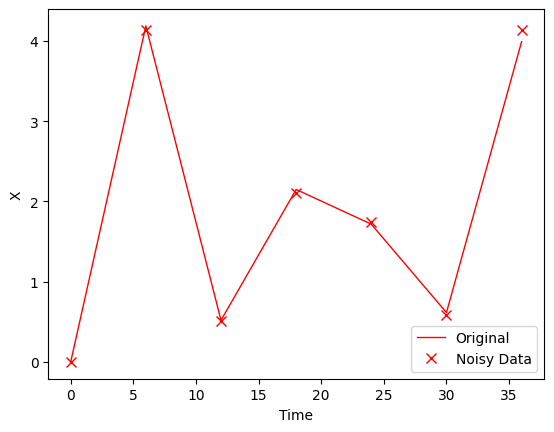

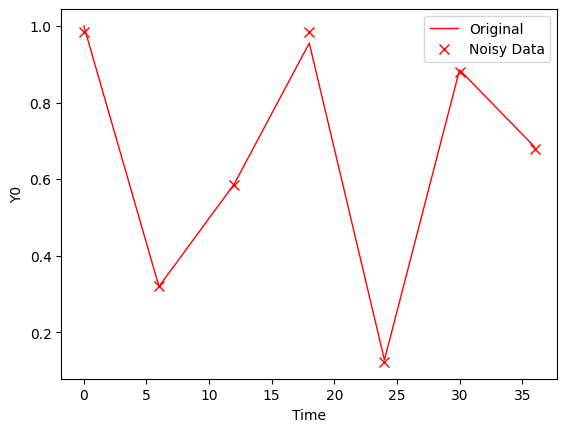

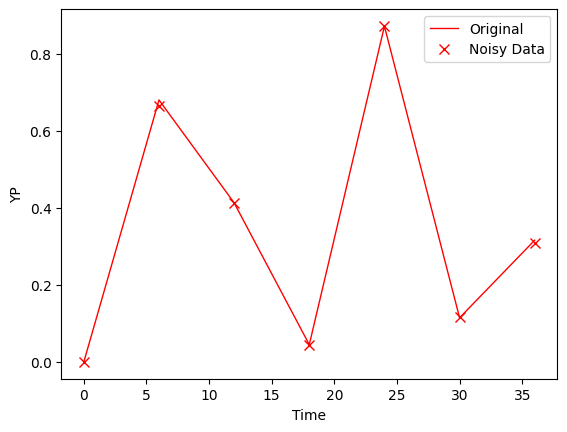

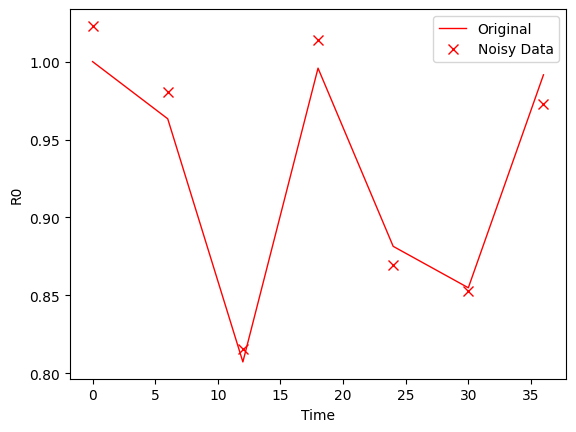

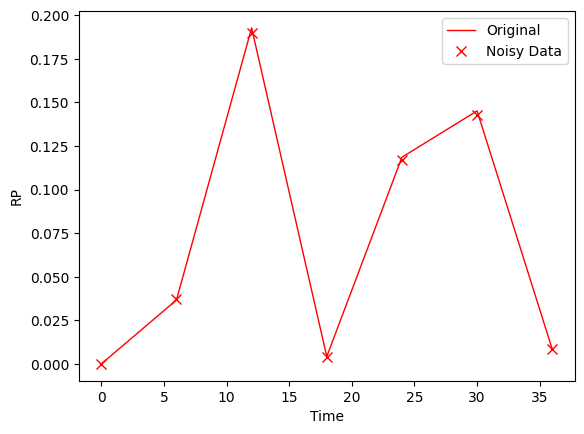

In [3]:
ts_data = res[:, 0]
dfs = []

for i, name in enumerate(SPEC_NAMES):
	spec_name = f"observable_{name}"
	cur_traj = res[:, i+1]
	
	std = NOISE * cur_traj
	noisy_data = gaussian_noise(cur_traj, std)
	
	N_DATA = len(T_PTS)
	# Save for later
	df = pd.DataFrame()

	df["observableId"] = [spec_name] * N_DATA
	df["simulationConditionId"] = ["simCondition"] * N_DATA
	df["measurement"] = noisy_data
	df["time"] = T_PTS

	plt.figure(dpi=100)
	plt.plot(ts_data, cur_traj, 'r-', lw=1, label="Original")
	plt.plot(T_PTS, noisy_data, 'rx', markersize=7, label="Noisy Data")
	plt.legend()
	plt.xlabel("Time");
	plt.ylabel(name);

In [17]:
N_DATA = len(T_PTS)
# Save for later
df = pd.DataFrame()

df["observableId"] = ["observable_Calcium"] * N_DATA
df["simulationConditionId"] = ["simCondition"] * N_DATA
df["measurement"] = noisy_data
df["time"] = T_PTS
#df["noiseParameters"] = [0] * N_DATA
df.to_csv("measurementData_Calcium_Oscillate.tsv", sep="\t", index=False)
df

,observableId,simulationConditionId,measurement,time
0,observable_Calcium,simCondition,6.217053,0.0
1,observable_Calcium,simCondition,0.622675,0.2
2,observable_Calcium,simCondition,1.564862,0.4
3,observable_Calcium,simCondition,3.138463,0.6
4,observable_Calcium,simCondition,6.070215,0.8
5,observable_Calcium,simCondition,10.210624,1.0
6,observable_Calcium,simCondition,19.794968,1.2
7,observable_Calcium,simCondition,34.738069,1.4
8,observable_Calcium,simCondition,71.754738,1.6
9,observable_Calcium,simCondition,183.575765,1.8


In [18]:
!petablint -h

/home/larkinit/anaconda3/envs/test1/lib/python3.12/site-packages/petab/v2/__init__.py:12: UserWarning: Support for PEtab2.0 and all of petab.v2 is experimental and subject to changes!
  warn(
usage: petablint [-h] [-v] [-s SBML_FILE_NAME] [-o OBSERVABLE_FILE_NAME]
                 [-m MEASUREMENT_FILE_NAME] [-c CONDITION_FILE_NAME]
                 [-p PARAMETER_FILE_NAME] [--vis VISUALIZATION_FILE_NAME]
                 [-y YAML_FILE_NAME_DEPRECATED]
                 [yaml_file_name]

Check if a set of files adheres to the PEtab format.

positional arguments:
  yaml_file_name        PEtab YAML problem filename

options:
  -h, --help            show this help message and exit
  -v, --verbose         More verbose output
  -y YAML_FILE_NAME_DEPRECATED, --yaml YAML_FILE_NAME_DEPRECATED
                        PEtab YAML problem filename. *DEPRECATED* pass the
                        file name as positional argument instead.

Check individual files *DEPRECATED*. Please contact us via https

In [19]:
!petablint ./Calcium_Oscillate.yaml

/home/larkinit/anaconda3/envs/test1/lib/python3.12/site-packages/petab/v2/__init__.py:12: UserWarning: Support for PEtab2.0 and all of petab.v2 is experimental and subject to changes!
  warn(
